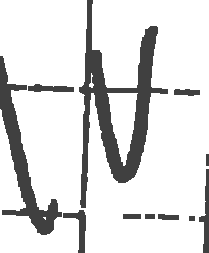

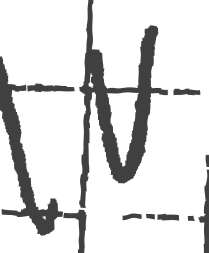

(253, 209, 3)

In [2]:
#try elastic transform https://www.kaggle.com/babbler/mnist-data-augmentation-with-elastic-distortion
import numpy as np
from PIL import Image
from IPython.display import display
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates
import cv2


def elastic_transform(image, alpha_range, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
       
   # Arguments
       image: Numpy array with shape (height, width, channels). 
       alpha_range: Float for fixed value or [lower, upper] for random value from uniform distribution.
           Controls intensity of deformation.
       sigma: Float, sigma of gaussian filter that smooths the displacement fields.
       random_state: `numpy.random.RandomState` object for generating displacement fields.
    """
    
    if random_state is None:
        random_state = np.random.RandomState(None)
        
    if np.isscalar(alpha_range):
        alpha = alpha_range
    else:
        alpha = np.random.uniform(low=alpha_range[0], high=alpha_range[1])

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

img=cv2.imread('/Users/simon/dcai_competition-summer_21/data/label_book/iv/a6d9760e-ce5d-11eb-b317-38f9d35ea60f.png')


trans_img=elastic_transform(img,alpha_range=[20, 25], sigma=4)
display(Image.fromarray(img))
display(Image.fromarray(trans_img))

img.shape

In [35]:
img.shape

(253, 209, 3)

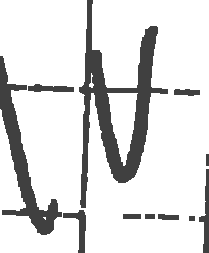

AttributeError: 'Tensor' object has no attribute '__array_interface__'

In [42]:
#FOR ADDING GAUSSIAN NOISE/SPECKLES https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def add_noise(img):
    #TensorFlow. 'x' = A placeholder for an image.
    shape = img.shape
    img = tf.placeholder(dtype = tf.float32, shape = shape)
    # Adding Gaussian noise
    noise = tf.random_normal(shape=tf.shape(img), mean=0.0, stddev=1.0,
    dtype=tf.float32)
    return tf.add(img, noise)
img=cv2.imread('/Users/simon/dcai_competition-summer_21/data/label_book/iv/a6d9760e-ce5d-11eb-b317-38f9d35ea60f.png')


trans_img=add_noise(img)
display(Image.fromarray(img))
display(Image.fromarray(trans_img))

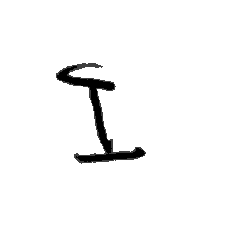

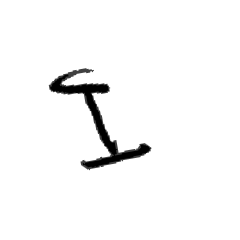

In [8]:
import numpy as np
import cv2
from IPython.display import display
img=cv2.imread('/Users/simon/dcai_competition-summer_21/data/val-clean/i/b1a4b210-ce5d-11eb-b317-38f9d35ea60f.png')
from PIL import Image

def rotate_image(image, angle):
  """
  Angle in degrees.
  """
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result



rotated_img=rotate_image(img,10)



display(Image.fromarray(img))
display(Image.fromarray(rotated_img))

In [ ]:
import numpy as np
import os
import cv2
def noisy(image):

    row,col,ch= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy
